In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [4]:
liked=pd.read_csv("usMerged.csv")
disliked=pd.read_csv("not100.csv")

In [5]:
# IMPORT PACKAGES
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, classification_report, confusion_matrix,
                             roc_auc_score, roc_curve, matthews_corrcoef)
from sklearn.utils import resample

# ADD TARGET COLUMN, 1 FOR LIKED SONGS, 0 FOR DISLIKED SONGS
liked['TARGET'] = 1
disliked['TARGET'] = 0

# COMBINE LIKED and DISLIKED PLAYLIST
combined = pd.concat([liked,disliked], ignore_index=True)

In [6]:
print('Liked Count:', len(liked))
print('Disliked Count:', len(disliked))

Liked Count: 892
Disliked Count: 658


In [7]:
# UPSAMPLING MINORITY CLASS (DISLIKED)

# SEPARATE MAJORITY AND MINORITY CLASSES
df_majority = combined[combined.TARGET==1]
df_minority = combined[combined.TARGET==0]
 
# UPSAMPLE MINORITY CLASS
df_minority_up = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=892,    # to match majority class
                                 random_state=123) # reproducible results
 
# COMBINED MAJORITY CLASS WITH UPSAMPLED MINORITY CLASS
df_upsampled = pd.concat([df_majority, df_minority_up])
 
# Display new class counts
df_upsampled.TARGET.value_counts()

1    892
0    892
Name: TARGET, dtype: int64

In [8]:
df_upsampled

,track_name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,playlist_id,first_artist,date_added,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Rolling in the Deep,Adele,0.729,0.7560,8,-5.119,1,0.0294,0.1310,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Party Rock Anthem,LMFAO,0.750,0.7270,5,-4.210,0,0.1420,0.0189,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Firework,Katy Perry,0.638,0.8320,8,-5.039,1,0.0490,0.1410,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E.T.,Katy Perry,0.602,0.8630,5,-5.423,0,0.0773,0.0178,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Give Me Everything (feat. Ne-Yo, Afrojack & Na...",Pitbull,0.672,0.9340,3,-3.206,1,0.1550,0.1610,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,Electric Feel,NaN,0.763,0.8070,1,-3.714,1,0.0350,0.0714,0.280000,...,21s75xxd4pIfMQKpzfuGMJ,MGMT,2017-07-19T05:08:24Z,audio_features,3FtYbEfBqAlGO46NUDQSAt,spotify:track:3FtYbEfBqAlGO46NUDQSAt,https://api.spotify.com/v1/tracks/3FtYbEfBqAlG...,https://api.spotify.com/v1/audio-analysis/3FtY...,229640.0,3.0
1402,Sugarcane,NaN,0.361,0.0165,0,-27.874,1,0.0615,0.9950,0.967000,...,37i9dQZF1DX4sWSpwq3LiO,Ana Olgica,2020-04-20T15:20:39Z,audio_features,6uWjjaiquXsjuQuks2mZME,spotify:track:6uWjjaiquXsjuQuks2mZME,https://api.spotify.com/v1/tracks/6uWjjaiquXsj...,https://api.spotify.com/v1/audio-analysis/6uWj...,144500.0,3.0
1371,Confidante,NaN,0.395,0.0377,1,-27.013,1,0.0438,0.9950,0.952000,...,37i9dQZF1DX4sWSpwq3LiO,Eric Cadogan,2020-04-20T15:20:39Z,audio_features,2xnLBULgfS7IifhN40kRWZ,spotify:track:2xnLBULgfS7IifhN40kRWZ,https://api.spotify.com/v1/tracks/2xnLBULgfS7I...,https://api.spotify.com/v1/audio-analysis/2xnL...,127750.0,3.0
1359,Dreamland - Solo Piano Version,NaN,0.238,0.0848,3,-22.482,1,0.0357,0.9850,0.898000,...,37i9dQZF1DX4sWSpwq3LiO,Alexis Ffrench,2020-04-20T15:20:39Z,audio_features,7IOW37zJgduauyHWdihAnl,spotify:track:7IOW37zJgduauyHWdihAnl,https://api.spotify.com/v1/tracks/7IOW37zJgdua...,https://api.spotify.com/v1/audio-analysis/7IOW...,161258.0,3.0


In [18]:
from sklearn.feature_selection import SelectKBest

df_upsampled=df_upsampled.drop(['track_name', 'artist', 'duration_s', 'playlist_id', 'first_artist',
                               'date_added', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'], axis=1)



KeyError: "['track_name' 'artist' 'duration_s' 'playlist_id' 'first_artist'\n 'date_added' 'type' 'id' 'uri' 'track_href' 'analysis_url' 'duration_ms'\n 'time_signature'] not found in axis"

In [20]:
features = SelectKBest(k=4)
features.fit(df_upsampled.loc[:, df_upsampled.columns != 'TARGET'], df_upsampled['TARGET'])

cols = list(df_upsampled.columns[features.get_support(1)])

In [21]:
cols

['energy', 'loudness', 'acousticness', 'instrumentalness']

In [11]:
# FEATURES & TARGET VARIABLE
features = df_upsampled[['energy','danceability','loudness','acousticness',
                        'instrumentalness']]
target = df_upsampled['TARGET']

In [12]:
# TRAINING / TESTING DATA
X_train, X_test, y_train, y_test = train_test_split(features, target)
print('Features Training Set:', X_train.shape, 'Features Testing Set:', X_test.shape)
print('Target Training Set:', y_train.shape, 'Target Testing Set:', y_test.shape)

Features Training Set: (1338, 5) Features Testing Set: (446, 5)
Target Training Set: (1338,) Target Testing Set: (446,)


In [13]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_y_pred = logreg.predict(X_test)

In [14]:
# SETUP K-NN CLASSIFIER K=1
knn = KNeighborsClassifier(n_neighbors=1)

# FIT CLASSIFIER W/ K NEIGHBORS TO TRAINING DATA
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

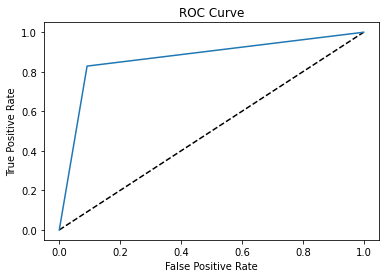

In [15]:
# ROC CURVE
y_pred_prob = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [16]:
# METRICS
print('Accuracy Score:', accuracy_score(y_test, y_pred))
y_pred_prob = knn.predict_proba(X_test)[:,1]
print('AUROC Score:',roc_auc_score(y_test, y_pred_prob))
print('MCC:', matthews_corrcoef(y_test, y_pred))
print('\n Clasification Report:\n', classification_report(y_test, y_pred))
cm =  confusion_matrix(y_test, y_pred)
print('\n Confusion Matrix:\n', cm)

Accuracy Score: 0.8699551569506726
AUROC Score: 0.8686996779388083
MCC: 0.7409876951023558

 Clasification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       230
           1       0.90      0.83      0.86       216

    accuracy                           0.87       446
   macro avg       0.87      0.87      0.87       446
weighted avg       0.87      0.87      0.87       446


 Confusion Matrix:
 [[209  21]
 [ 37 179]]


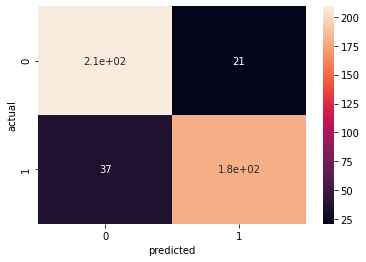

In [17]:
import seaborn as sn

con_matrix=pd.crosstab(y_test, y_pred, rownames=['actual'], colnames=['predicted'])
sn.heatmap(con_matrix, annot=True)